In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets.california_housing import fetch_california_housing
housing = fetch_california_housing()
# print(housing.DESCR)
print(housing.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
from sklearn import tree
dtr = tree.DecisionTreeRegressor(max_depth= 3)
dtr.fit(housing.data[:,0:7],housing.target)
print(housing.data[:,0:7])

[[8.32520000e+00 4.10000000e+01 6.98412698e+00 ... 3.22000000e+02
  2.55555556e+00 3.78800000e+01]
 [8.30140000e+00 2.10000000e+01 6.23813708e+00 ... 2.40100000e+03
  2.10984183e+00 3.78600000e+01]
 [7.25740000e+00 5.20000000e+01 8.28813559e+00 ... 4.96000000e+02
  2.80225989e+00 3.78500000e+01]
 ...
 [1.70000000e+00 1.70000000e+01 5.20554273e+00 ... 1.00700000e+03
  2.32563510e+00 3.94300000e+01]
 [1.86720000e+00 1.80000000e+01 5.32951289e+00 ... 7.41000000e+02
  2.12320917e+00 3.94300000e+01]
 [2.38860000e+00 1.60000000e+01 5.25471698e+00 ... 1.38700000e+03
  2.61698113e+00 3.93700000e+01]]


In [5]:
dot_data = tree.export_graphviz(dtr, out_file=None,feature_names=housing.feature_names[0:7],filled=True,impurity=False,rounded=True)

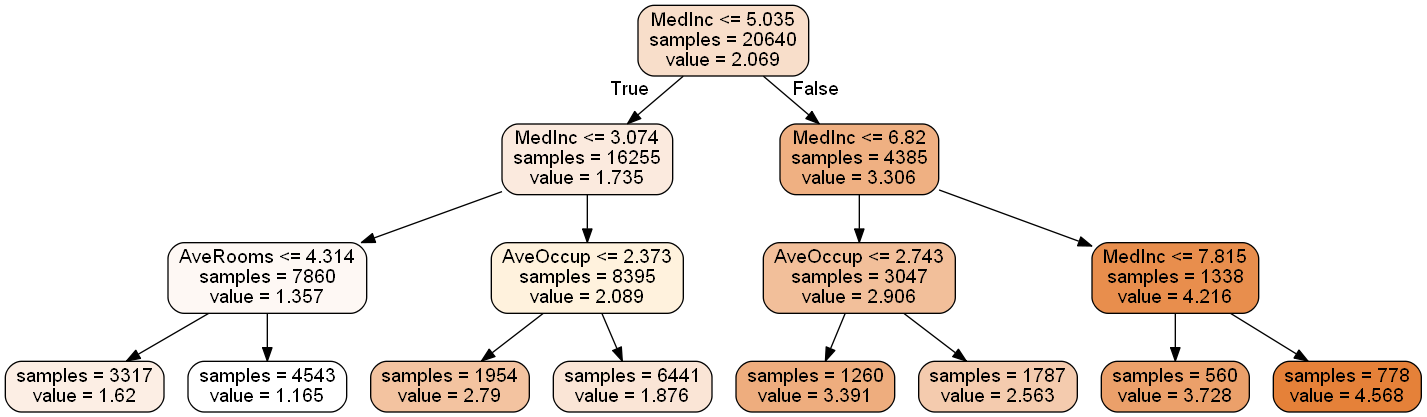

In [6]:
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.get_nodes()[7].set_fillcolor("#FFF2DD")
from IPython.display import Image
Image(graph.create_png())

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(housing.data,housing.target,test_size = 0.1, random_state=42)
dtr = tree.DecisionTreeRegressor(random_state=42)
dtr.fit(X_train,Y_train)
dtr.score(X_test,Y_test)

0.6310922690494536

In [8]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=35)
rfr.fit(X_train,Y_train)
rfr.score(X_test,Y_test)

0.8104172690557505